Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = ""

---

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In ~4-5 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background, equations you plan to solve and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

In this project, I attempt to replicate a model for migration by Robinson et al.'s paper "A Machine Learning Approach to Modeling Human Migration" (2017). In this paper run multiple models to track migration based off of IRS migration datasets on counties and compare errors between them. They cover traditional models such as gravity and radiation models with their own productive functions, a boosting gradient, and an artificial neural network. Alternatively, due to the scope of this project, I will only be focusing on one, which is the deep learning artificial neural network. They used the neural network builder offered by Keras, so I will be applying the same library to help solve this problem.

To start, they didn't document their experiments online. The first author, Caleb Robinson, has a library they created to analyze the data, however, there was no documentation of the machine learning models mentioned in the paper, and data to create the experiments was missing. However, they used similar data and methods for another paper titled "Modeling Migration Patterns in the USA Under Sea Level Rise" (2020). Since all of their modeling and evaluation methods were built around flooding probabilities and how it affects migration, I shifted my goals and decided to see if I could generate a good enough migration model to predict population per 3106 counties per year. The primary datasets were yearly IRS Migration data from 2004-2014 [link here](https://www.irs.gov/statistics/soi-tax-stats-migration-data). The counties were numerically represented by Federal Information Processing Standards (FIPS) county codes. The raw contents of this data are in /project/county_migration0506.txt (all datasets have the same document with different years). 

The equations I plan to solve are the errors they used to evaluate their methods, plus a custom loss function for the neural network. One evaluation method was not included (CPCd) since it depended on distance traveled. There was no retrievable distance matrix so this was neglected. They did have one in their 2020 paper, but it was reliant on that paper's data on hurricanes and flooding. Their errors from the 2017 paper includes: 

**Common part of commuters** (CPC), which compares number of travelers between training and validation data.

**Common part of commuters distance variant** ($CPC_d$) neglected.

**Root mean squared error** to punish large errors.

**Coefficient of determination** $r^2$, goodness of fit.

The custom loss function will be elaborated in the computational methods section.

I will also keep track of accuracy between epochs (number of passes through the neural network) while training the model, and plot their values with the hope of proving correctness of the soluion.

Data processing is provided in /project/4300project/Proccess Migration Data.ipynb.

#### Sources

Robinson Migration library:

[link](https://github.com/calebrob6/migration-lib)

Robinson Migration 2020 repository:

[link](https://github.com/calebrob6/migration-slr)

##### Papers Referenced
Robinson, C., &amp; Dilkina, B. (2017). A machine learning approach to modeling human migration. Proceedings of the 1st ACM SIGCAS Conference on Computing and Sustainable Societies. https://doi.org/10.1145/3209811.3209868 

Robinson, C., Dilkina, B., &amp; Moreno-Cruz, J. (2020). Modeling migration patterns in the USA under sea level rise. PLOS ONE, 15(1). https://doi.org/10.1371/journal.pone.0227436 

## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

Human migration is very unpredictable due to unexpected events (weather disasters, earthquake, politics, etc.) Although this is the case, there are countless datasets online that track migration. As a result, some people use this data in order to predict future populations. This is useful due to the fact that policies or school funding can be heavily dependent on population size (Robinson et al. 2017).

This is very important to me because I believe that this can help greatly with modeling migration of refugees and displaced people while considering unpredictable events that could have caused their departure from home.

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



For the neural network, I will follow the same parameters the authors used to tune their neural network for their 2020 paper. Each neural network has an input layer, a series of hidden layers, and an output layer. Each consist of nodes that are the core of training the network.

To train the network, the data is split into population estimates from 2004-2008 for training and 2010-2014 for validation. This split is arbituary given that the authors did not specify how they divided up the data.

The input layer will expect 4 inputs (one is left for validation during training), the two hidden layers with have 128 nodes, there are 500 epochs, and a mini-batch size of $2^{14}$. These are parameters included in the authors' 2020 paper.

In the 2017 paper, the authors looked at 10-50 epochs and 16-128 layer width with 1-5 layers. Due to the tendency for the network to crash while being recompiled multiple times in a loop, I will stick to the 2020 parameters.

The loss function is similar to the $CPC$ error.

$$
  CPC(T,\hat{T}) = \frac{2 \sum_{i,j=1}^{n} min(T_{ij},\hat{T}_{ij})}{\sum_{i,j=1}^{n} T_{ij} + \sum_{i,j=1}^{n} \hat{T}_{ij}}
$$

Here i = origin and j = destination. Due to the fact that we are just having populations, we can ignore the origin and destinations.

$T$ will be the predicted population per county vector while $\hat{T}$ is the ground truth value vector. 

$n$ is the length of the $T$ vector.

The loss function is :

$$
  L(y,\hat{y}) = 1 - \frac{2 \sum_{i=1}^{n} min(y_{i},\hat{y}_{i})}{\sum_{i=1}^{n} y_{i} + \sum_{i=1}^{n} \hat{y_i}}
$$

Here $y_i$ is an element of T.

This is the gradient update of the loss function:
$$
  \frac{\partial L(y,\hat{y})}{\partial y_i} = \frac{2 \sum_{i=1}^{n} min(y_{i},\hat{y}_{i})}{\left(\sum_{i=1}^{n} y_{i} + \sum_{i=1}^{n} \hat{y_i}\right)^2}
$$

Finally, the root mean squared error (RMSE) and coefficient of determination ($r^2$) are:

$$
  RMSE(T,\hat{T}) = \sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(T_i - \hat{T_i}\right)^2}
$$

$$
  r^2(T,\hat{T}) = 1 - \frac{\sum_{i=1}^{n} \left(T_i - \hat{T_i}\right)^2}{\sum_{i=1}^{n} \left(T_i - \bar{T_i}\right)^2}
$$

Where $\bar T$ is the averagae of the prediction vector.

In terms of creating a test for the model, I decided to compare cpc value of its prediction and compare it to the paper's values by seeing if it's just as accurate, less, or more accurate.

Extra packages and their uses are described in the coding block below.

In [3]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah

'''These are packages necessary after data processing for training. The packages required for processing are located
in the /project/4300project/data folder. '''

#Install tensorflow to install keras
!pip install tensorflow
!pip install keras

#common array, math, and file manipulation packages
import pandas as pd
import numpy as np
import sys, os, time, math, csv

#efficient iterations
import itertools

#plotting
import matplotlib
import matplotlib.pyplot as plt

#numerical methods
import scipy.optimize

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

#tools for lightweight pipelining, i.e.optimize loops
import joblib


#load txt file
from numpy import loadtxt

#machine learning package
import keras
import keras.models
import keras.backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, AlphaDropout, Input, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping






## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

### Methods

The dataset was processed in the notebook indicated in problem description. The authors were able to sort the raw data from the IRS to population estimates per county per year.

After loading and splitting the data into training and validation sections, the functions for errors were defined as well as a function to compile the neural network model. This function also includes the layers of the network and their width. Like the authors, the activation function used is a rectified linear unit activation function (ReLU), which is a peicewise linear function used to train the nodes (neurons).

I create more errors to compare to the paper's measured errors. After, I create the model, compile it, and fit it to the training data. I save the model and open it to make a prediction. This prediction's $r^2$ value is tested against the paper's value. If my value is higher, the test with pass if it performs better than the paper's value.

Next, I want to see the convergence over different epochs and plot those convergences with labels. Finally, I will calculate the relative error, cpc, and rmse of just the final prediction and validation datasets after the model runs through all epochs. 

In [4]:
#post processing data section

#load processed data
dataset = loadtxt('4300project/data/processed/county_population_2004_2014-Copy1.csv', delimiter=',')

#column 0 represents FIPS while columns 1-11 the populations of 3601 counties per year (2004-2014)
print("        FIPs      2004    2005            2012    2013   2014")
dataset

        FIPs      2004    2005            2012    2013   2014


array([[  1001.,  48366.,  49676., ...,  54927.,  54695.,  54864.],
       [  1003., 156266., 162183., ..., 190048., 194736., 199064.],
       [  1005.,  28287.,  28027., ...,  27175.,  26947.,  26749.],
       ...,
       [ 56041.,  19470.,  19494., ...,  20999.,  20960.,  20845.],
       [ 56043.,   7960.,   8022., ...,   8421.,   8427.,   8288.],
       [ 56045.,   6646.,   6594., ...,   7074.,   7136.,   7142.]])

In [5]:
#choose training data
x_train = dataset[:,1:5] #input
y_train = dataset[:,5] #anticipated output

#evaluation data used predict
x_val = dataset[:,6:10] #input
y_val = dataset[:,11] #output to match



In [6]:
#define functions

#neural network loss function
def cpc_loss(y_true, y_pred):
    return 1.0 - (2.0*K.sum(K.minimum(y_true,y_pred))) / (K.sum(y_true) + K.sum(y_pred))

#to track mean squared error (chosen by authors) between epochs
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

from keras import backend

#to track rmse between epochs, personal choice since it fits well with one of their error evaluations
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))


In [7]:
#neural network builder with compiler
def baseline_model():
    inputs = Input(shape=(4,))
    x = inputs

    x = Dense(128, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    
    outputs = Dense(1, activation="relu")(x)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    optimizer = Adam(lr=0.001)

    model.compile(loss=cpc_loss, metrics=["mse", cpc_loss, rmse], optimizer=optimizer)
    return model

In [8]:
#other errors from computational methods section


def cpc(prediction, y_val):
    
    numerator_array = []
    
    for i in np.arange(len(prediction)):
        
        numerator = 2*np.minimum(prediction[i],y_val[i])
        numerator_array.append(numerator)
        
    numerator_sum = np.sum(numerator_array)
    denominator = np.sum(prediction) + np.sum(y_val)
    
    cpc = numerator_sum/denominator
    
    return cpc


def rmse_whole_dataset(prediction, y_val):
    
    squared_error_array = []
    
    for i in np.arange(len(prediction)):
        
        squared_error = (y_val[i]-prediction[i])**2
        squared_error_array.append(squared_error)
        
    s_e = np.sum(squared_error_array)
    
    rmse = (s_e/len(prediction))**0.5
    
    return rmse

def cod(prediction, y_val):
    
    #coefficient of determination r^2
    
    numerator_array = []
    denominator_array = []
    
    y_val_avg = np.mean(y_val)
    
    for i in np.arange(len(prediction)):
        
        squared_error = (y_val[i]-prediction[i])**2
        
        numerator_array.append(squared_error)
        
        denom_se = (y_val[i]-y_val_avg)**2
        
        denominator_array.append(denom_se)
        
    numerator = np.sum(numerator_array)
    
    denominator = np.sum(denominator_array)
    
    r_squared = 1-(numerator/denominator)
    
    return r_squared

In [9]:
#to stop training if loss is minimized to the point that it doesn't change
early_stopping = EarlyStopping(monitor="cpc_loss", patience=100, restore_best_weights=True)

#create model
model = keras.wrappers.scikit_learn.KerasRegressor(
    build_fn=baseline_model,
    epochs=500,
    batch_size=2**14,
    callbacks=[early_stopping],
    verbose=0
)

#fit model

history = model.fit(x_train, y_train)

#store model as a retrievable object
scaler = StandardScaler()

history.model.save("output/trainedtest.h5")
joblib.dump(scaler, "output/another_trainedtest.p")

#retrieve model
model_retrieval = keras.models.load_model("output/trainedtest.h5", custom_objects={"cpc_loss":"mse","rmse":rmse})
#make prediction
prediction = model_retrieval.predict(x_val, batch_size=2**12,verbose=0)

#calculate an error for a test
cod_value = cod(prediction,y_val)

#using numpy.testing.assert_array_less to see if r^2, goodness of fit, is more or less accurate than the paper's 
#0 being no matches and 1 being complete match

paper_cpc_nn = 0.91
numpy.testing.assert_array_less(paper_cpc_nn, cod_value)

<ipython-input-9-934673263939>:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasRegressor(
/opt/conda/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


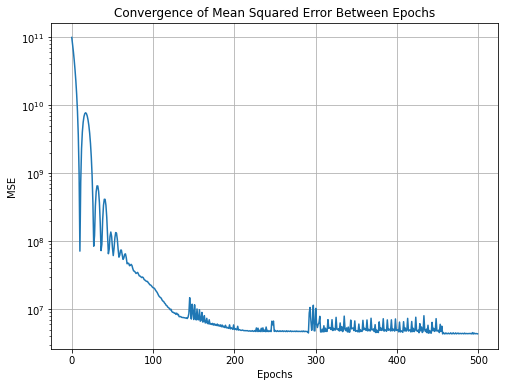

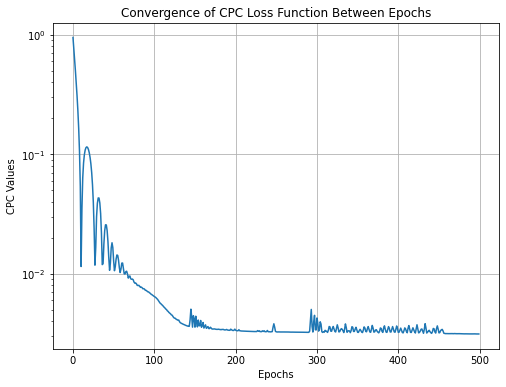

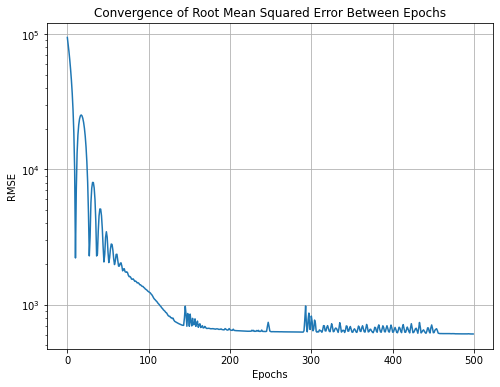

4308094.5
607.5650634765625


In [10]:
#for uniquesness of results, lets see the progression of accuracy between our chosen loss function
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.semilogy(history.history["mse"])
axes.set_title("Convergence of Mean Squared Error Between Epochs")
axes.set_xlabel("Epochs")
axes.set_ylabel("MSE")
axes.grid()

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.semilogy(history.history['cpc_loss'])
axes.set_title("Convergence of CPC Loss Function Between Epochs")
axes.set_xlabel("Epochs")
axes.set_ylabel("CPC Values")
axes.grid()

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.semilogy(history.history['rmse'])
axes.set_title("Convergence of Root Mean Squared Error Between Epochs")
axes.set_xlabel("Epochs")
axes.set_ylabel("RMSE")
axes.grid()

plt.show()
print(min(history.history["mse"]))
print(min(history.history['rmse']))

In [11]:
#calculate mean relative error between prediction and validation data

rel_error_array = []
for i in np.arange(len(y_val)):
    rel_error = abs(y_val[i]-prediction[i])/y_val[i]
    rel_error_array.append(rel_error)

np.mean(rel_error_array, axis=0)

array([0.01457665], dtype=float32)

cpc(prediction,y_val)

## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


* Why should I believe that your numerical results are correct (convergence, test cases etc)?

The most compelling result is the convergence of the CPC loss function, which is promising since it was the custom loss function that the researchers focused on. Also, $r^2$ of the model was supposedly larger than the paper's (0.91) since it passed the testing cell. The MSE of this model (4.13e6) was very off the paper's mse (911), and so were the RSME values (552.9 vs 35.1).

I think the results are correct given how I minimized the scope of the project was to notice migration as population changes in counties over time. The goodness of fit was very high (0.9866) and there was a low relative error (1-0.9866). 

This being the case, the model's convergence is not stable passed a number of epochs for any of the convergence plots.

That being said, these are parameters for the 2020 paper. The paper I am trying to reproduce had at max 50 epochs with a bash size of $2^{14}$. Given that around 50 on those plots, the errors were very high, I was not able to reproduce their work.

* Did the project work (in your opinion)?
I think with my goal to generate a working neural network the project did work. I am able to make future predictions predictions that are validated with little relative error with the ground truth values.

* If yes:  what would be the next steps to try
The next steps I would try to lower the errors even further. I would like to stabilize the convergence for a smaller amount of epochs. This could be solved by finding a balance between epoch and bash size, as well as including intervention opportunities, population densities, and mean household income as factors. Additionally, I would plot these results over a map to visualize migration over time. This would save time and computational power.

* If no:  Explain why your approach did not work and what you would do differently next time